## 기본 Word2Vec 영어 데이터 학습
- 참고 : https://monetd.github.io/python/nlp/Word-Embedding-Word2Vec-%EC%8B%A4%EC%8A%B5/
- CBOW, Skip-gram 비교

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7a2955d55a80>)

- xml 문법으로 되어 있어 자연어를 얻기 위해서는 전처리가 필요
- 전처리 작업을 통해 xml 문법에 해당하는 단어를 삭제해야 함
- (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 등장하는 데 이런 단어들 또한 제거

In [ ]:
# 데이터 전처리

targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [ ]:
# word2vec 훈련 - CBOW

from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

- `vector_size` : 만들어질 워드 벡터의 차원
- `window` : 컨텍스트 윈도우의 크기. 컨텍스트 윈도우는 단어 앞과 뒤에서 몇개 단어를 볼것인지를 정하는 크기이다.
- `min_count` = 단어 최소 빈도수의 임계치(이 임계치보다 적은 단어는 훈련시키지 않는다.)
- `workers` = 학습에 이용하는 프로세스의 갯수
- `sg = 0` 일 경우, CBOW, `sg = 1` 일 경우 Skip-gram

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8498218655586243), ('guy', 0.824999213218689), ('lady', 0.783025324344635), ('boy', 0.7642711400985718), ('gentleman', 0.742914080619812), ('girl', 0.7369710803031921), ('soldier', 0.7194852828979492), ('kid', 0.6780073046684265), ('poet', 0.6636995673179626), ('surgeon', 0.6557962894439697)]


In [ ]:
# word2vec 훈련 - Skip-gram

from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [46]:
model_result = model.wv.most_similar("man")
print(model.wv["man"]) # 모델 결과값 확인
print()
print(model.wv.similarity('man', 'boy')) # wv.similarity : 두 word vector의 유사도 비교
print()
print(model_result)

[ 0.14648098 -0.29181674 -0.00542737 -0.16426589  0.29298654 -0.4274295
  0.18220654  0.2203718  -0.43115914 -0.07060359 -0.04031717 -0.08265309
  0.12697087  0.09970428 -0.04970359 -0.20304134  0.2196123  -0.4121206
 -0.2619371  -0.22817549 -0.10273408 -0.02756221  0.11681171 -0.03895072
  0.21622045 -0.01178275 -0.63098717 -0.43913698 -0.38877127 -0.5635809
  0.2089861   0.32766473 -0.22883949 -0.08731493  0.03278437  0.4222441
  0.06903461 -0.13826755 -0.00440708 -0.6302582  -0.07821713 -0.6279219
 -0.24930954 -0.06807212  0.08526024 -0.05977004 -0.5327772   0.07396923
 -0.26097187 -0.00593006  0.10716388 -0.14026669  0.06916127  0.5931127
 -0.09535857  0.37356514  0.07366909 -0.18726961 -0.5895015  -0.01631604
  0.10303468  0.05093203  0.55558604  0.3809911  -0.48562163 -0.04936494
 -0.07353846 -0.16402425 -0.1641244   0.25734153 -0.18227749  0.12894581
  0.21413498 -0.02915546  0.06252301 -0.12895769  0.16324669  0.0084444
 -0.42945966  0.11121757  0.16172646 -0.07816106 -0.779574

### t-SNE 시각화
- Word2Vec 모델을 사용하여 학습한 CBOW 모델을 시각화하는 방법은 주로 임베딩된 단어 벡터를 2차원 또는 3차원으로 축소
- 학습된 단어 임베딩을 2차원 공간에 시각화



Number of samples: 500


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


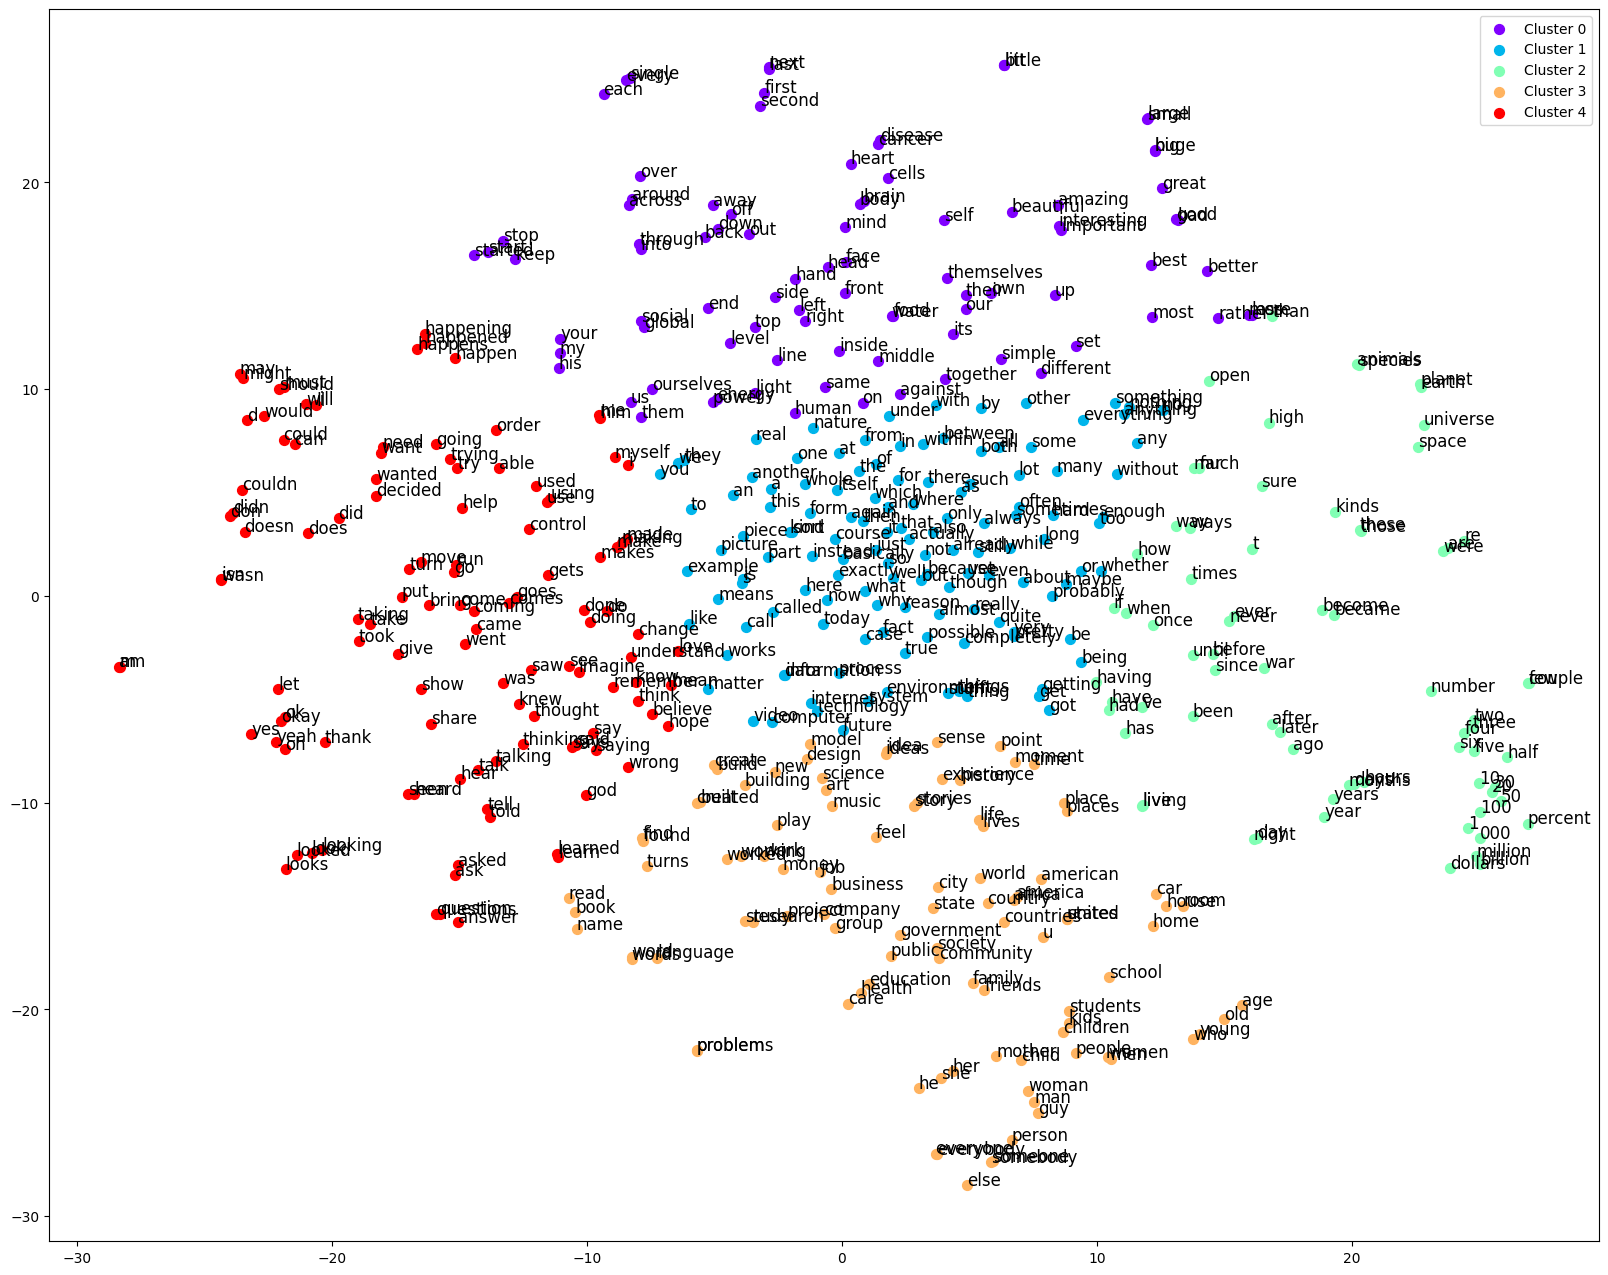

In [43]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

# 학습된 단어 벡터를 가져옵니다.
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# 상위 500개의 단어만 선택합니다.
top_n = 500
top_words = words[:top_n]
top_word_vectors = model.wv[top_words]

# t-SNE를 사용하여 2차원으로 차원 축소합니다.
# top_word_vectors의 샘플 수 확인
num_samples = len(top_word_vectors)
print(f'Number of samples: {num_samples}')

# perplexity 값을 num_samples보다 작게 설정합니다.
perplexity_value = min(30, num_samples - 1)

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
word_vectors_2d = tsne.fit_transform(top_word_vectors)

# KMeans를 사용하여 군집화합니다.
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(word_vectors_2d)

# 시각화를 위한 플롯을 생성합니다.
plt.figure(figsize=(20, 16))  # 플롯 크기 설정

# 군집에 따라 색상을 달리하여 단어들을 플롯합니다.
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))

for i in range(num_clusters):
    cluster_points = word_vectors_2d[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=f'Cluster {i}')

# 각 단어를 플롯에 표시합니다.
for i, word in enumerate(top_words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.legend()
plt.show()


- top_n 값을 설정하여 상위 50개의 단어를 선택
- t-SNE를 사용하여 선택된 단어 벡터를 2차원으로 차원 축소
- K-means 알고리즘을 사용하여 단어 벡터를 군집화
- 각 군집에 대해 다른 색상을 지정하여 단어들을 플롯
- 각 단어를 플롯에 표시하고, 범례를 추가


## 적은 양의 텍스트가 포함된 기사 word2vec
- 공항시스템의 랜섬웨어감염에 관한 기사
- 출처 : https://m.blog.naver.com/rekt77/221361106051

In [ ]:
!pip install nltk
!pip install gensim

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=9cc570e6841577df450cdd9e6ec13f5ede3c19e7180f96008d19707c23a14bd9
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 14.5 MB/s eta 0:00:00


In [ ]:
import nltk
from gensim.models.word2vec import Word2Vec
import string

In [ ]:
#stopword 목록 다운로드
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

# load data
with open('/content/hakernews.txt','rt') as f:
    text = f.read()

translator = str.maketrans('', '', string.punctuation)

# each.translate(translator) == 특수문자 제거
# x.lower() == 소문자화
# if x.lower() not in stop_words == 불용어제거
clean = [[x.lower() for x in each.translate(translator).split() if x.lower() not in stop_words] for each in text.split('.\n')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
model = Word2Vec(sentences=clean, vector_size=100, window=5, min_count=5, workers=4, sg=0)

#print(list(model.wv.vocab.keys()))
#print("vocab length : %d"%len(model.wv.vocab))

In [ ]:
model_result = model.wv.most_similar("attack")
print(model_result)

[('screens', 0.17018885910511017), ('information', 0.004503022879362106), ('airport', -0.027750348672270775), ('flight', -0.04461711645126343)]
